**Going to practice with motor data set from mne dataset example at *mne.datasets.fnirs_motor.data_path()***

This dataset contains a single subject recorded at Macquarie University. It has optodes placed over the motor cortex. 

**There are three conditions:**

1. tapping the left thumb to fingers

2. tapping the right thumb to fingers

3. a control where nothing happens

The tapping lasts 5 seconds, and there are 30 trials of each condition.

In [1]:
import os.path as op
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
from numpy.testing import assert_allclose

import mne
import pysnirf2

MODULE_PATH = op.join(os.getcwd(), 'mne_nirs\\__init__.py')
MODULE_NAME = 'mne_nirs'

import importlib
import sys
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)



from mne.io import read_raw_nirx, read_raw_snirf
from mne_nirs.io import write_raw_snirf

NIRS can be performed using methods in continuous wave (CW) (constant illumination), time domain (TD) (pulsed illumination and time-resolved detection), or frequency domain (FD) (intensity-modulated illumination and phase-resolved detection). CW techniques are the most common.

In [2]:

#Get path to local copy of fnirs_motor dataset
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
print(fnirs_data_folder)

#returns path to file with data for 1st participant
#cw_amplitude means "continuous-wave amplitude"--i.e. the intensity
#of the light being shone doesn't change
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')


#read in NIRX fNIRS recording with path to the data
#documetation of Raw objects at https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose = True)

#load raw data
raw_intensity.load_data()


C:\Users\taubm\mne_data\MNE-fNIRS-motor-data
Loading C:\Users\taubm\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

Loading C:\Users\taubm\Desktop\mne-nirs\test_raw.snirf
Using matplotlib as 2D backend.
Opening raw-browser...


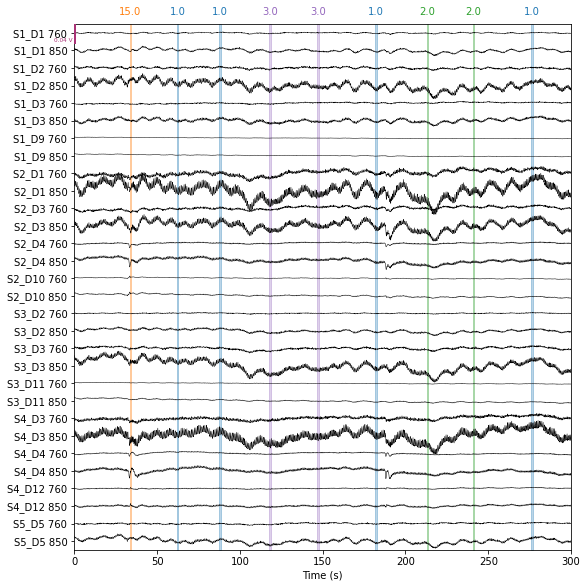

In [3]:
#write data from NIRX file to snirf file for mne-nirs package
write_raw_snirf(raw_intensity, 'test_raw.snirf')

#read back the new snirf file
snirf_intensity = read_raw_snirf('test_raw.snirf')

#make sure the data from the original file and the SNIRF file
#have the same values
assert_allclose(raw_intensity.get_data(), snirf_intensity.get_data())
snirf_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [4]:

# %%
# Validate SNIRF File
# -------------------
#
# To validate that a file complies with the SNIRF standard you should use the
# official SNIRF validator from the Boston University Neurophotonics Center
# called ``pysnirf2``. Detailed instructions for this program can be found at
# https://github.com/BUNPC/pysnirf2. Below we demonstrate that the files created
# by MNE-NIRS are compliant with the specification.

result = pysnirf2.validateSnirf('test_raw.snirf')
assert result.is_valid()
result.display()


Found 304 OK      (hidden)
Found 522 INFO    (hidden)
Found 0 WARNING
Found 0 FATAL  

File is VALID


### now I have the NIRX format (raw intensity) and the snirf format data (snirf_intensity)

Opening raw-browser...


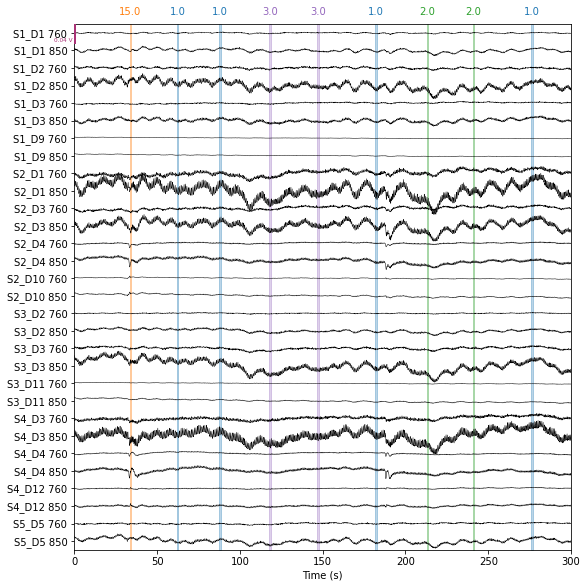

In [5]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

based on the description of the experiment, "First, we attribute more meaningful names to the trigger codes which are stored as annotations. Second, we include information about the duration of each stimulus, which was 5 seconds for all conditions in this experiment. Third, we remove the trigger code 15, which signaled the start and end of the experiment and is not relevant to our analysis."


In [6]:
raw_intensity.annotations

<Annotations | 92 segments: 1.0 (30), 15.0 (2), 2.0 (30), 3.0 (30)>

In [7]:
raw_intensity.describe()

raw_intensity.annotations.set_durations(5)

#C = control, TL = tapping left, and TR = tapping right
raw_intensity.annotations.rename({'1.0': 'C',
                                  '2.0': 'TL',
                                  '3.0': 'TR'})

#C = control, TL = tapping left, and TR = tapping right
#raw_intensity.set_annotations(description = ['Start', 'C', 'TL', 'TR'])

#.rename(1.0':'Control',\
#                                 '2.0':'Tapping/Left',\
 #                                '3.0':'Tapping/Right'})

unwanted = np.nonzero(raw_intensity.annotations.description == '15.0')
raw_intensity.annotations.delete(unwanted)

<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>
ch  name        type                unit        min         Q1     median         Q3        max
 0  S1_D1 760   FNIRS_CW_AMPLITUDE  V          0.09       0.09       0.10       0.10       0.10
 1  S1_D1 850   FNIRS_CW_AMPLITUDE  V          0.17       0.19       0.19       0.19       0.21
 2  S1_D2 760   FNIRS_CW_AMPLITUDE  V          0.22       0.22       0.23       0.23       0.24
 3  S1_D2 850   FNIRS_CW_AMPLITUDE  V          0.58       0.61       0.61       0.62       0.65
 4  S1_D3 760   FNIRS_CW_AMPLITUDE  V          0.10       0.11       0.12       0.12       0.13
 5  S1_D3 850   FNIRS_CW_AMPLITUDE  V          0.26       0.28       0.29       0.30       0.32
 6  S1_D9 760   FNIRS_CW_AMPLITUDE  V          0.07       0.07       0.07       0.07       0.08
 7  S1_D9 850   FNIRS_CW_AMPLITUDE  V          0.11       0.11       0.11       0.12       0.13
 8  S2_D1 760   FNIRS_CW_AMPLITUDE  V          0.53       0.59  

Opening raw-browser...


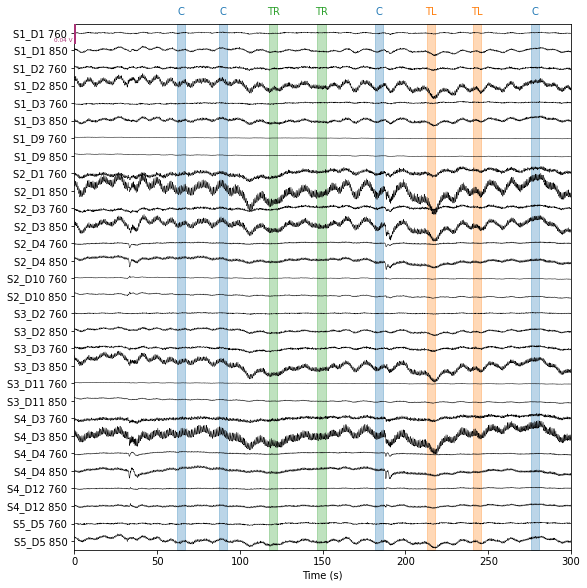

In [8]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [9]:
#important: finally how to get the channel names
raw_intensity.ch_names

#to get all data
#raw_intensity._data

['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D3 760',
 'S1_D3 850',
 'S1_D9 760',
 'S1_D9 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D3 760',
 'S2_D3 850',
 'S2_D4 760',
 'S2_D4 850',
 'S2_D10 760',
 'S2_D10 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D11 760',
 'S3_D11 850',
 'S4_D3 760',
 'S4_D3 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D12 760',
 'S4_D12 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D6 760',
 'S5_D6 850',
 'S5_D7 760',
 'S5_D7 850',
 'S5_D13 760',
 'S5_D13 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D7 760',
 'S6_D7 850',
 'S6_D8 760',
 'S6_D8 850',
 'S6_D14 760',
 'S6_D14 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D15 760',
 'S7_D15 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D8 760',
 'S8_D8 850',
 'S8_D16 760',
 'S8_D16 850']

### Select good channels

First we remove channels that are too close together (short channels) to detect a neural response (less than 1 cm distance between optodes). These short channels can be seen in the figure above. To achieve this we pick all the channels that are not considered to be short.

**channels too close together aren't good**

Opening raw-browser...


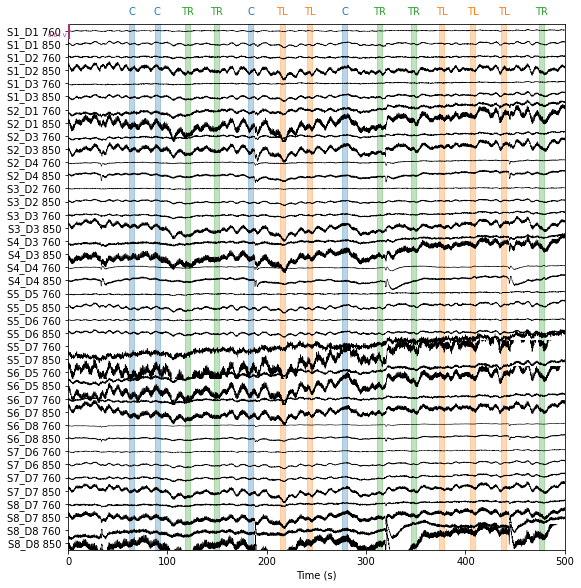

In [10]:
#picks_types picks the channels by type and name.
#here this picks all fnirs channels
picks = mne.pick_types(raw_intensity.info, fnirs=True)

#gives the distances between detectors
dists = mne.preprocessing.nirs.source_detector_distances(
    raw_intensity.info, picks=picks)

#selects the channels with detectors creater than 1 cm apart
raw_intensity.pick(picks[dists > 0.01])

#plot
raw_intensity.plot(n_channels=len(raw_intensity.ch_names),
                   duration=500, show_scrollbars=False);

Opening raw-browser...


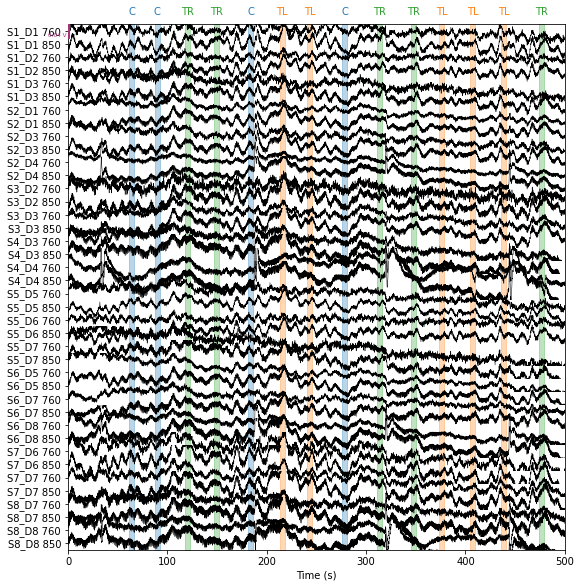

In [11]:
#to convert from "raw intensity" to "optical density",
#remove negative values--change to their absolute values
#and make sure all values are > 0

raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)

#^the function is at https://github.com/mne-tools/mne-python/blob/maint/0.24/mne/preprocessing/nirs/_optical_density.py
#It was harder to understand than I thought

#^maybe figure out how to do this

raw_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);


# Now evaluate the data quality

### 1) Visual Inspection

Look for presence of physiological noise (heart rate) and motion artefacts (presence of baseline drift, baseline shift, and/or spike motion artefacts)



info about processing the data before analyzing it from file:///C:/Users/taubm/Downloads/brainsci-11-00606.pdf:

# Why use pre-processing and processing for raw fNIRS optical density data

**HRF = hemodynamic response function**

The primary goal of the pre-processing and processing of fNIRS data is to isolate
the hemodynamic changes occurring in the vascular network of the gray matter. This is
achieved by filtering raw data and estimating a HRF through modeling. These are referred
to as pre-processing and processing, respectively. **In pre-processing, the objective is toremove extraneous noise from the raw data.** Noise can be classified as either **systematic**
such as respiration, cardiac pulsation (heart rate), and changes in blood pressure. or **motion artefact (MA) noise** [9,22,23]. Noise removal techniques are applied prior to
the HRF estimation. **Frequently used pre-processing techniques include frequency filters,
wavelet, and smoothing filters.** Additionally, alternative methods such as **pre-whitening**
can be used. Once the raw data has undergone pre-processing, methods are used to convert
changes in light intensity to concentration changes in hemoglobin. **Processing is used to
compare baseline and task-related hemodynamic changes [24].** These can be separated
into either **general linear model (GLM) or non-GLM processing methods** such as block
averaging and linear mixed models.



# So now I'm going to do pre-processing to remove noise


## 1) first I'm going to look at systematic (regular & repeated) noise (e.g. heart rate, blood pressure, breathing)

### Going to do low-pass, high-pass, and bandpass filtering

**Note:** There are two general types of frequency filters for denoising: **infinite impulse response (IIR)** and
**finite impulse response (FIR) filters.** The mathematical equations for these two types
of filters differ in their filter coefficients, which are calculated as the ratio between the
sampling frequency of the system and the cutoff frequency of the filter. FIR filters has filter coefficients that only depend on the data inputs to the filter. IIR filters depend on both the input data at each point & the previous outputs of the filter from all points before that.

**Low-pass filter** get rid of or diminish frequencies above a certain value. This is used to get rid of high-frequency environmental noise like extra light, and physiological noise like cardiac pulsation and respiration.

High-pass filters get rid of or diminish frequencies below a certain value. This is used to get rid of low frequency noise, mainly from baseline drift (gradual movement of the optode sensors along the scalp). **use scalp coupling index to analyze baseline drift**

Band-pass filters get rid of/dimish frequencies outside of a specific range.

These filters are used in fNIRS to attenuate high- and low-frequency physiological
and instrumental noise.


To find best range for band-pass filter, applying a fast Fourier transform (FFT) to an fNIRS dataset will allow the researcher to visually inspect the data and determine the spectral location of noises within a dataset

### Use scalp coupling index analysis to look for baseline drift

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

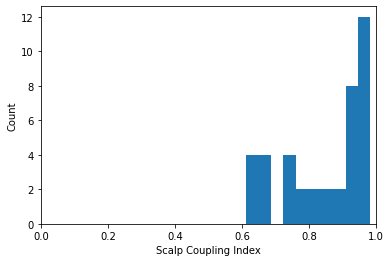

In [12]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

fig, ax = plt.subplots()
ax.hist(sci)

ax.set(xlabel = 'Scalp Coupling Index', ylabel = 'Count', xlim = [0,1])

### need to practice making my own band-pass filter

### note: The optical density or absorbance of a material is a logarithmic intensity ratio of the light falling upon the material, to the light transmitted through the material.

In fNIRS, photons of light are projected into the
scalp by the source optode and pass through the skull and into the upper cortical regions.
These photons are scattered and reflected as they travel through the head. Some of these
photons are absorbed by the chromophores of oxy-Hb and deoxy-Hb [4]. The photons
that are not absorbed are reflected and follow an elliptical path back to the surface of the
scalp. These photons are measured using the detector optode [4]. As the concentration
of oxy-Hb increases during neurovascular coupling, the intensity of the reflected light
decreases. This process is a result of an increase in light photon absorption from the increased concentration of oxy-Hb in the activated region. 




The modified Beer–Lambert law
is used to quantify changes in oxy-Hb and deoxy-Hb as a result of neurovascular coupling
(see Figure 1b). In this equation, optical density (OD) is equal to the negative log of the
attenuated light intensity (I) over the initial light intensity (I_0). (t) represents time and (λ)
represents the wavelength of light being used. This inverse relationship is equal to the
sum of the molar extinction coefficient (ε_i) multiplied by the concentration of hemoglobin
(c_i). These terms are multiplied by the differential pathlength factor (DPF), which accounts for the increase in distance that light travels due to light scatter, and the source-detector distance (d), where (i) represents all of the investigated chromophores. (G) represents the
intensity of light lost due to scattering. Additionally, this equation accounts for the scattering of the light photons [5–7]. Concentration changes are determined by taking the inverse log of the light that was projected into the scalp by the light that was detected. Water
is assumed to be a constant in this model as it will not change during neurovascular coupling.

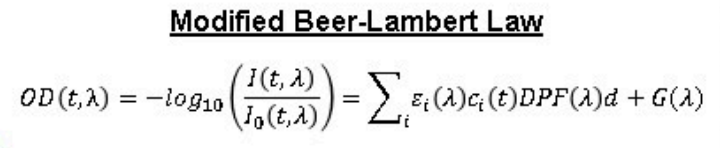

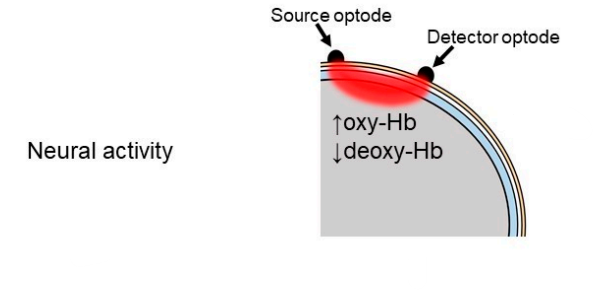

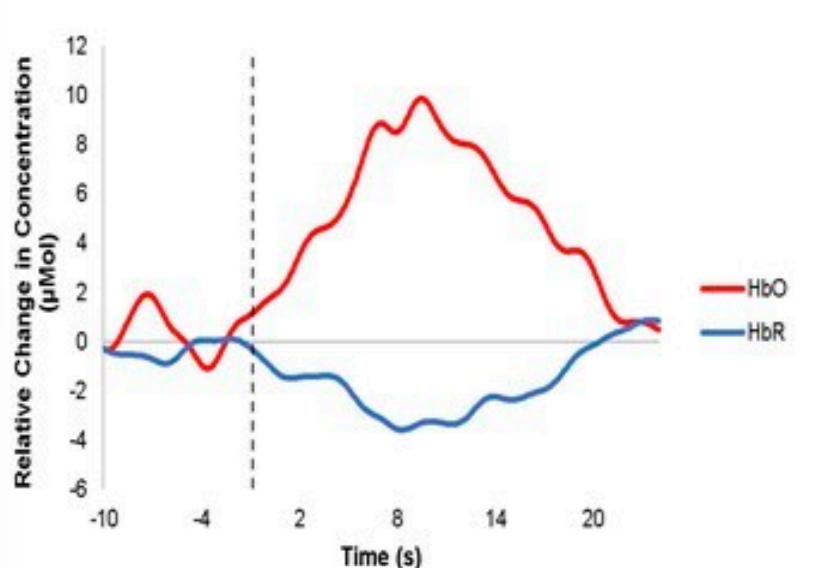

In [14]:
#first visually remove any spikes I see

Opening raw-browser...


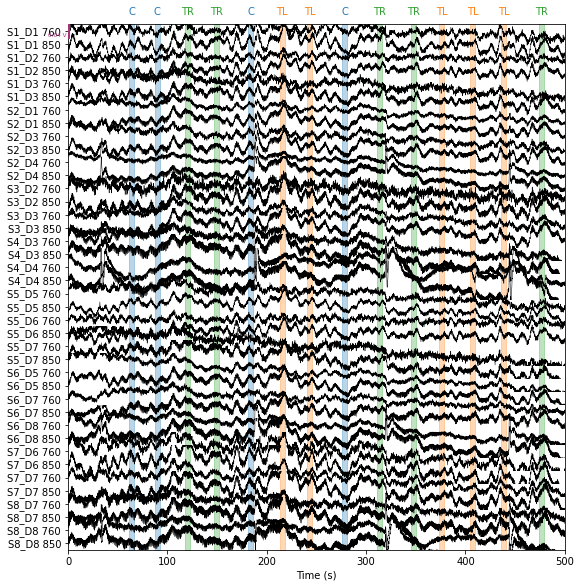

In [16]:

raw_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);

To remove baseline shift and spike artifacts:

https://github.com/mne-tools/mne-python/blob/maint/0.24/mne/preprocessing/nirs/_tddr.py#L16-L56


based on paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6230489/

might use this for my filter:

*Although no definitive parameters have been defined in the
literature, Naseer and Hong [31] recommend a passband of 0.1~0.4 Hz to remove most
physiological and instrumental noises from fNIRS data if the task period is 10 s in length.*

baseline correction: Baseline correction was applied per trial where the mean of
the baseline was subtracted from each time point in the trial.

do analysis techniques from this thesis (simple): file:///C:/Users/taubm/Downloads/hue_dang%20(2).pdf

If I'm feeling ambitous I can make the TDDR algorithm

### Apply temporal derivative distribution repair

This approach corrects baseline shift and spike artifacts without the need for any user-supplied parameters

Opening raw-browser...


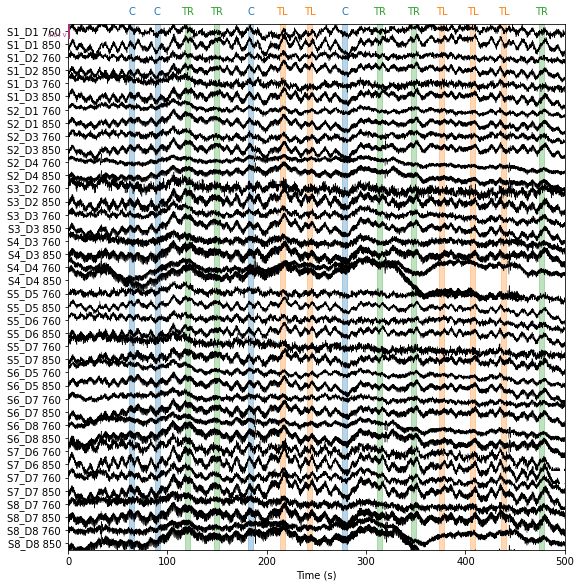

In [22]:
from mne.preprocessing.nirs import (optical_density,
                                    temporal_derivative_distribution_repair)

corrected_od = temporal_derivative_distribution_repair(raw_od)

corrected_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);

also use two papers above (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6230489/) and (file:///C:/Users/taubm/Downloads/hue_dang%20(2).pdf) to choose filter optical densities--> base it off of deviation from normal distribution (b/c systematic
stuff like heart rate is not independent/normally 
distributed).
 